#### Work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. 

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

Using visualizations, start to explore questions from the dataset like:

**Using scatter plots**
- Do students in more popular majors make more money?

**Using histograms**
- How many majors are predominantly male? Predominantly female?

**Using bar plots**
- Which category of majors have the most students?


In [2]:
# To make plots using Matplotlib, you must first enable IPython's matplotlib mode.
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
recent_grads = pd.read_csv("recent-grads.csv")

# Use DataFrame.iloc[] to return the first row formatted as a table.
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# Use DataFrame.describe() to generate summary statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# Look up the number of rows
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

# Drop rows containing missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count) 

173
172


If you create a new cell in jupyter notebook and run `.plot()`, the scatter plot will be displayed immediately. This functionality is a byproduct of running the jupyter magic `%matplotlib inline`.

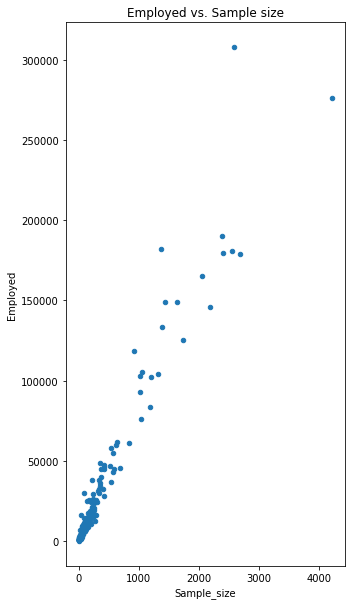

In [8]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample size', figsize=(5,10))

##### Access the underlying matplotlib Axes object by assigning the return value to a variable.

Text(0.5,1,'Employed vs. Sample_size')

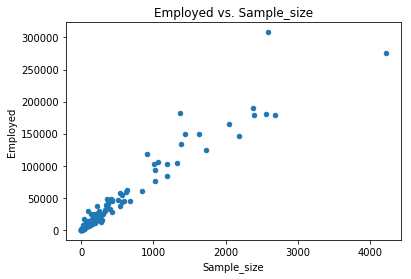

In [9]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

### Generate scatter plots in separate jupyter notebook cells to explore the following relations:
- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

Text(0.5,1,'Sample_size vs. Median')

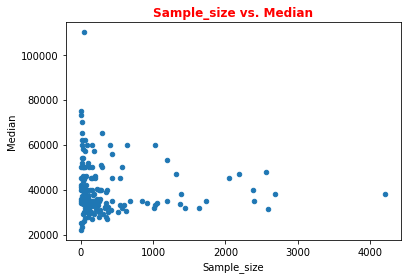

In [10]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median', weight='bold', color='red')

Text(0.5,1,'Sample_size vs. Unemployment')

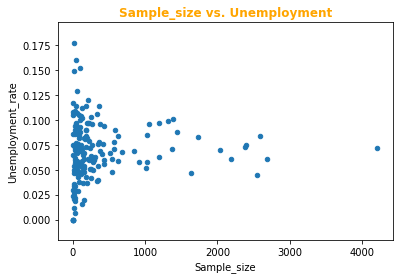

In [11]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample_size vs. Unemployment', weight='bold', color='orange')

Text(0.5,1,'Full_time vs. Median')

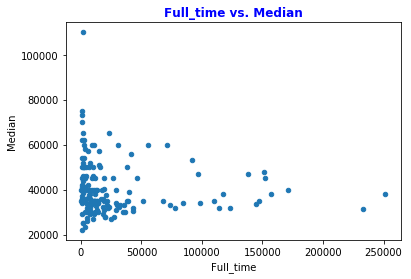

In [12]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full_time vs. Median', weight='bold', color='blue')

Text(0.5,1,'ShareWomen vs. Unemployment_rate')

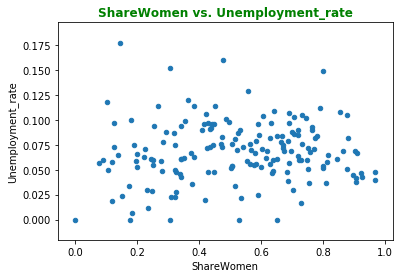

In [13]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('ShareWomen vs. Unemployment_rate', weight='bold', color='green')

Text(0.5,1,'Men vs. Median')

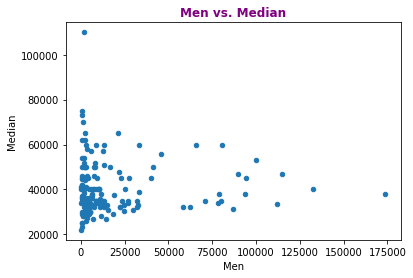

In [14]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs. Median', weight='bold', color='purple')

Text(0.5,1,'Women vs. Median')

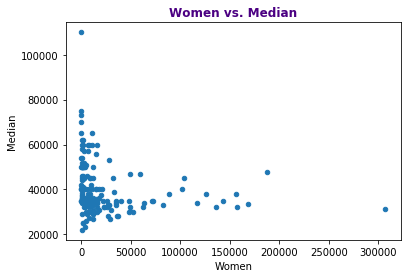

In [15]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('Women vs. Median', weight='bold', color='indigo')

#### Do students in more popular majors make more money?

It appears from the plot that female-majority subjects mostly fall between USD 28000 and 35000.  That range falls within the range of 'Most Popular' majors shown above, which represents the majority of the sampled group. So students who major in female-majority subjects don't make more money.

Text(0.5,0,'Total Students with Major')

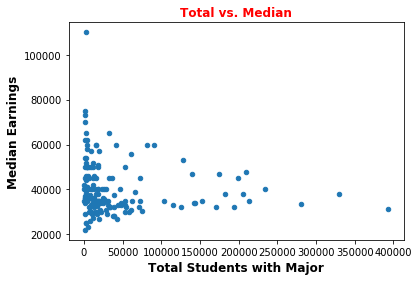

In [16]:
# Total number of people with major and Median earnings of full-time, year-round workers
ax = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax.set_title('Total vs. Median', weight='bold', color='red')
ax.set_ylabel(ylabel='Median Earnings', weight='bold', size=12)
ax.set_xlabel(xlabel="Total Students with Major", weight='bold', size=12)

#### Do students that majored in subjects that were majority female make more money?

It appears from the plot that female-majority subjects mostly fall between USD 28000 and 35000.  That range falls within the range of 'Most Popular' majors shown above, which represents the majority of the sampled group. So students who major in female-majority subjects don't make more money.

Text(0,0.5,'Median earnings')

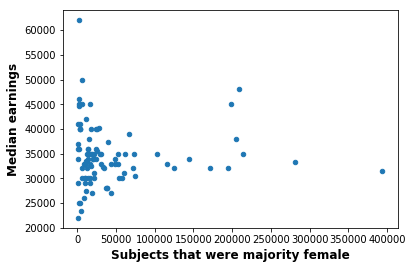

In [17]:
ax = recent_grads[recent_grads['ShareWomen'] > .5].plot(x='Total', y='Median', kind='scatter')
ax.set_xlabel(xlabel='Subjects that were majority female', weight='bold', size=12)
ax.set_ylabel(ylabel='Median earnings', weight='bold', size=12)

#### Is there any link between the number of full-time employees and median salary?

Yes, there is a link. The average salary falls around USD 40000 which matches the part of the scatter graph where the majority of full-time employees are most concentrated (between 36000 to 45000).

count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64
count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64


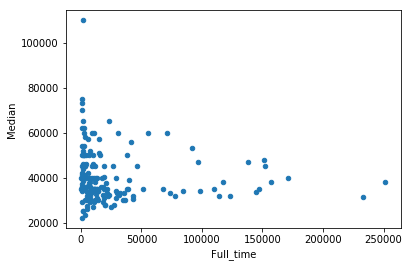

In [18]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
print(recent_grads['Full_time'].describe())
print(recent_grads['Median'].describe())

### Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

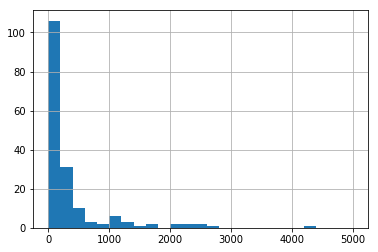

In [19]:
recent_grads['Sample_size'].hist(bins=25, range=(0, 5000))


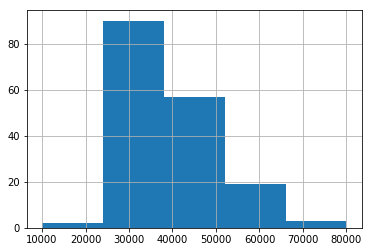

In [82]:
recent_grads['Median'].hist(bins=5, range=(10000, 80000))

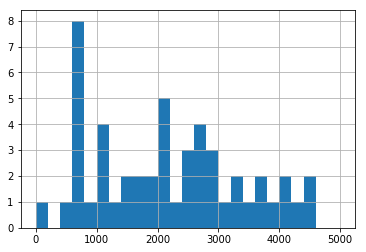

In [21]:
recent_grads['Employed'].hist(bins=25, range=(0, 5000))

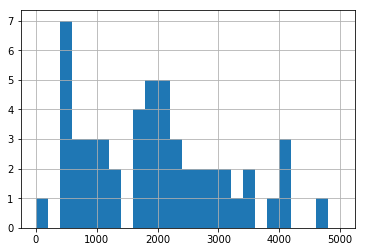

In [22]:
recent_grads['Full_time'].hist(bins=25, range=(0, 5000))

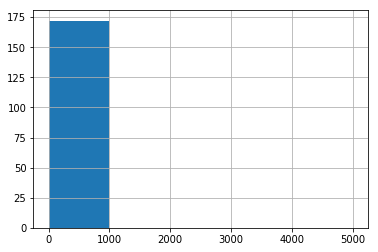

In [89]:
recent_grads['ShareWomen'].hist(bins=5, range=(0, 5000))

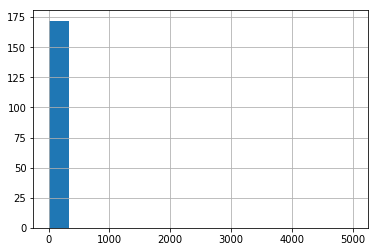

In [24]:
recent_grads['Unemployment_rate'].hist(bins=15, range=(0, 5000))

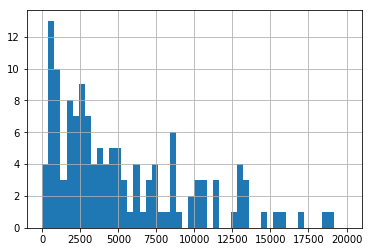

In [25]:
recent_grads['Men'].hist(bins=50, range=(0, 20000))

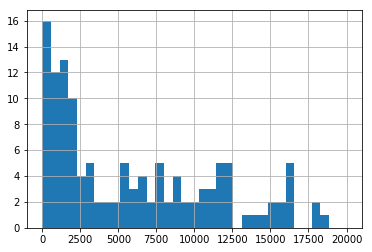

In [26]:
recent_grads['Women'].hist(bins=35, range=(0, 20000))

### Use the plots to explore the following questions:
- What percent of majors are predominantly male? 
- Predominantly female?
- What's the most common median salary range?

#### What percent of majors are predominantly male?

44%

In [75]:
male_dominant_majors = recent_grads[recent_grads['ShareWomen'] < .5]
percentage_male = round(male_dominant_majors['Men'].count() / recent_grads.count() * 100)
percentage_male.mean()


44.0

#### What percent of majors are predominantly female?

56%

In [78]:
female_dominant_majors = recent_grads[recent_grads['ShareWomen'] > .5]
percentage_female = round(female_dominant_majors['Women'].count() / recent_grads.count() * 100)
percentage_female.mean()

56.0

#### What's the most common median salary range?
Between USD 32000 and 35000

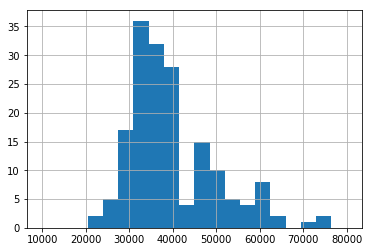

In [98]:
recent_grads['Median'].hist(bins=20, range=(10000, 80000))